In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [360]:
df=pd.read_csv("D:\\Vcodez\\Project\\Dataset\\additionalTrainData.csv")
df.head()

,title,budget,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,tagline,rating,totalVotes,revenue
0,Vice,60000000,tt6266538,en,Vice,"George W. Bush picks Dick Cheney, the CEO of H...",75.120,25-12-2018,132.0,The Untold True Story That Changed The Course ...,7.2,511,45520237
1,Mary Queen of Scots,25000000,tt2328900,en,Mary Queen of Scots,"Mary Stuart, considered by many the legitimate...",96.340,21-12-2018,125.0,Bow To No One,6.7,182,37807625
2,Mary Poppins Returns,130000000,tt5028340,en,Mary Poppins Returns,"In Depression-era London, a now-grown Jane and...",91.674,19-12-2018,131.0,Magic Always Returns,6.8,824,320264753
3,They Shall Not Grow Old,0,tt7905466,en,They Shall Not Grow Old,A documentary about World War I with never-bef...,11.180,17-12-2018,99.0,NaN,8.1,66,9700000
4,Bumblebee,128000000,tt4701182,en,Bumblebee,"On the run in the year 1987, Bumblebee finds r...",116.519,15-12-2018,114.0,Every adventure has a beginning,6.4,1222,420361283


In [361]:
print(df.head())
print(df.tail())

                     title     budget    imdb_id original_language  \
0                     Vice   60000000  tt6266538                en   
1      Mary Queen of Scots   25000000  tt2328900                en   
2     Mary Poppins Returns  130000000  tt5028340                en   
3  They Shall Not Grow Old          0  tt7905466                en   
4                Bumblebee  128000000  tt4701182                en   

            original_title                                           overview  \
0                     Vice  George W. Bush picks Dick Cheney, the CEO of H...   
1      Mary Queen of Scots  Mary Stuart, considered by many the legitimate...   
2     Mary Poppins Returns  In Depression-era London, a now-grown Jane and...   
3  They Shall Not Grow Old  A documentary about World War I with never-bef...   
4                Bumblebee  On the run in the year 1987, Bumblebee finds r...   

   popularity release_date  runtime  \
0      75.120   25-12-2018    132.0   
1      96.340 

In [362]:
df.shape

(2001, 13)

In [363]:
df.describe()

,budget,popularity,runtime,rating,totalVotes,revenue
count,2.001000e+03,2001.000000,1895.000000,2001.000000,2001.000000,2.001000e+03
mean,8.175905e+06,6.261923,104.446966,5.404798,243.652674,2.699920e+07
std,5.444112e+07,16.760743,33.482335,2.482693,876.351487,1.134352e+08
min,0.000000e+00,0.600000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000e+00,0.667000,90.000000,4.900000,2.000000,5.460600e+04
50%,2.500000e+04,1.960000,102.000000,6.000000,15.000000,1.451600e+06
75%,2.020000e+06,5.938000,122.000000,6.900000,98.000000,8.569623e+06
max,2.147484e+09,293.620000,300.000000,10.000000,11405.000000,2.046240e+09


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2001 non-null   object 
 1   budget             2001 non-null   int64  
 2   imdb_id            1870 non-null   object 
 3   original_language  2001 non-null   object 
 4   original_title     2001 non-null   object 
 5   overview           1894 non-null   object 
 6   popularity         2001 non-null   float64
 7   release_date       2001 non-null   object 
 8   runtime            1895 non-null   float64
 9   tagline            1024 non-null   object 
 10  rating             2001 non-null   float64
 11  totalVotes         2001 non-null   int64  
 12  revenue            2001 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 203.4+ KB


1.DATASET CLEANING

In [365]:
df.drop(["original_title"],axis=1,inplace=True)
df

,title,budget,imdb_id,original_language,overview,popularity,release_date,runtime,tagline,rating,totalVotes,revenue
0,Vice,60000000,tt6266538,en,"George W. Bush picks Dick Cheney, the CEO of H...",75.120,25-12-2018,132.0,The Untold True Story That Changed The Course ...,7.2,511,45520237
1,Mary Queen of Scots,25000000,tt2328900,en,"Mary Stuart, considered by many the legitimate...",96.340,21-12-2018,125.0,Bow To No One,6.7,182,37807625
2,Mary Poppins Returns,130000000,tt5028340,en,"In Depression-era London, a now-grown Jane and...",91.674,19-12-2018,131.0,Magic Always Returns,6.8,824,320264753
3,They Shall Not Grow Old,0,tt7905466,en,A documentary about World War I with never-bef...,11.180,17-12-2018,99.0,NaN,8.1,66,9700000
4,Bumblebee,128000000,tt4701182,en,"On the run in the year 1987, Bumblebee finds r...",116.519,15-12-2018,114.0,Every adventure has a beginning,6.4,1222,420361283
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,A Daughter of the Gods,1000000,tt0006568,en,A sultan agrees to help an evil witch destroy ...,0.680,16-10-1916,180.0,NaN,5.0,1,1390000
1997,Maria Rosa,18575,tt0007038,en,Ramon loves Catalonian peasant Maria Rosa. He ...,0.600,07-05-1916,50.0,NaN,0.0,0,102768
1998,Temptation,22472,tt0006140,en,Opera singer Renee Dupree is in love with stru...,0.600,15-12-1915,60.0,NaN,0.0,0,102437
1999,The Rose of the Rancho,16988,tt0004545,en,"Esra Kincaid takes land by force and, having t...",0.600,15-11-1914,NaN,The magnificent dramatic classic!,0.0,0,87028


In [366]:
df.isnull().sum()

title                  0
budget                 0
imdb_id              131
original_language      0
overview             107
popularity             0
release_date           0
runtime              106
tagline              977
rating                 0
totalVotes             0
revenue                0
dtype: int64

In [367]:
df['imdb_id'].fillna(value='Not available',inplace=True) 

C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\2037726607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_id'].fillna(value='Not available',inplace=True)


In [368]:
df['imdb_id'].fillna(method='ffill',inplace=True) 

C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\1341822520.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['imdb_id'].fillna(method='ffill',inplace=True)


In [369]:
df['imdb_id'].fillna(method='bfill',inplace=True)

C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\2615208636.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['imdb_id'].fillna(method='bfill',inplace=True)


In [370]:
df.dropna(inplace=True)

In [371]:
df.isnull().sum()

title                0
budget               0
imdb_id              0
original_language    0
overview             0
popularity           0
release_date         0
runtime              0
tagline              0
rating               0
totalVotes           0
revenue              0
dtype: int64

In [372]:
df['original_language'] = df['original_language'].astype(str).str.strip().str.upper()
df['original_language'] = df['original_language'].replace({
    'AR': 'Arabic',
    'AZ': 'Azerbaijani',
    'BN': 'Bengali',
    'BS': 'Bosnian',
    'CA': 'Catalan',
    'CN': 'Unknown',
    'DA': 'Danish',
    'DE': 'German',
    'DV': 'Dhivehi',
    'EL': 'Modern Greek (1453-)',
    'EN': 'English',
    'ES': 'Spanish',
    'ET': 'Estonian',
    'FA': 'Persian',
    'FI': 'Finnish',
    'FR': 'French',
    'GU': 'Gujarati',
    'HE': 'Hebrew',
    'HI': 'Hindi',
    'HT': 'Haitian',
    'HU': 'Hungarian',
    'ID': 'Indonesian',
    'IT': 'Italian',
    'JA': 'Japanese',
    'KN': 'Kannada',
    'KO': 'Korean',
    'ML': 'Malayalam',
    'MN': 'Mongolian',
    'MS': 'Malay (macrolanguage)',
    'NE': 'Nepali (macrolanguage)',
    'NL': 'Dutch',
    'NO': 'Norwegian',
    'PA': 'Panjabi',
    'PL': 'Polish',
    'PT': 'Portuguese',
    'RO': 'Romanian',
    'RU': 'Russian',
    'SI': 'Sinhala',
    'SK': 'Slovak',
    'SQ': 'Albanian',
    'SV': 'Swedish',
    'TA': 'Tamil',
    'TE': 'Telugu',
    'TH': 'Thai',
    'TL': 'Tagalog',
    'TR': 'Turkish',
    'UK': 'Ukrainian',
    'UR': 'Urdu',
    'VI': 'Vietnamese',
    'XH': 'Xhosa',
    'ZH': 'Chinese'
})


In [373]:
df.duplicated()

0       False
1       False
2       False
4       False
5       False
        ...  
1986    False
1987    False
1989    False
1992    False
1995    False
Length: 1014, dtype: bool

In [374]:
df.head()

,title,budget,imdb_id,original_language,overview,popularity,release_date,runtime,tagline,rating,totalVotes,revenue
0,Vice,60000000,tt6266538,English,"George W. Bush picks Dick Cheney, the CEO of H...",75.120,25-12-2018,132.0,The Untold True Story That Changed The Course ...,7.2,511,45520237
1,Mary Queen of Scots,25000000,tt2328900,English,"Mary Stuart, considered by many the legitimate...",96.340,21-12-2018,125.0,Bow To No One,6.7,182,37807625
2,Mary Poppins Returns,130000000,tt5028340,English,"In Depression-era London, a now-grown Jane and...",91.674,19-12-2018,131.0,Magic Always Returns,6.8,824,320264753
4,Bumblebee,128000000,tt4701182,English,"On the run in the year 1987, Bumblebee finds r...",116.519,15-12-2018,114.0,Every adventure has a beginning,6.4,1222,420361283
5,Dragon Ball Super: Broly,8500000,tt7961060,Japanese,Earth is peaceful following the Tournament of ...,62.533,14-12-2018,101.0,Three Saiyans directed by fate... an uncontrol...,7.4,395,89617139


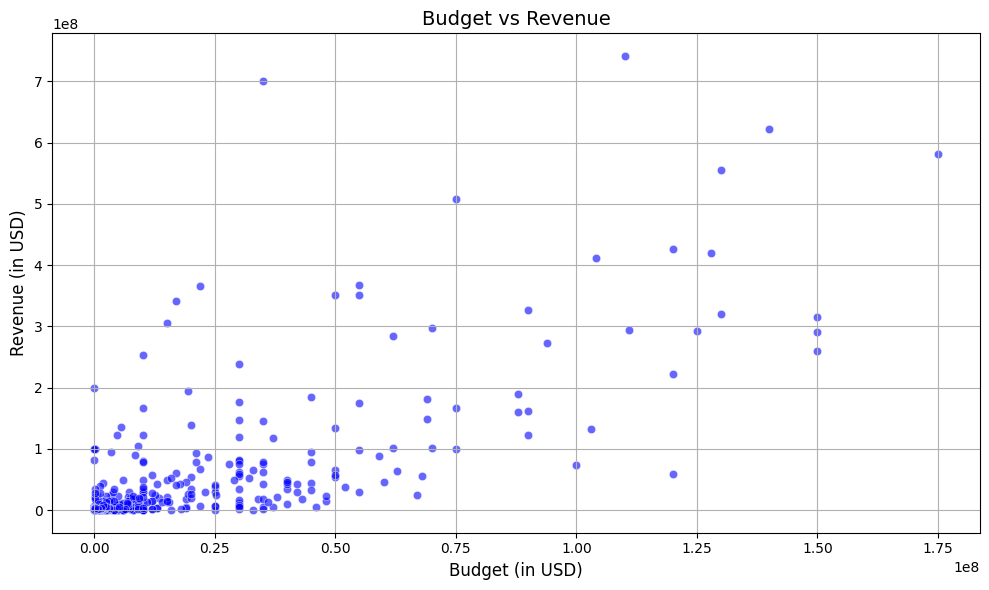

In [375]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df_clean = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df_clean = df_clean[df_clean['budget'] < df_clean['budget'].quantile(0.99)]
df_clean = df_clean[df_clean['revenue'] < df_clean['revenue'].quantile(0.99)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_clean, color='blue', alpha=0.6)
plt.title("Budget vs Revenue", fontsize=14)
plt.xlabel("Budget (in USD)", fontsize=12)
plt.ylabel("Revenue (in USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

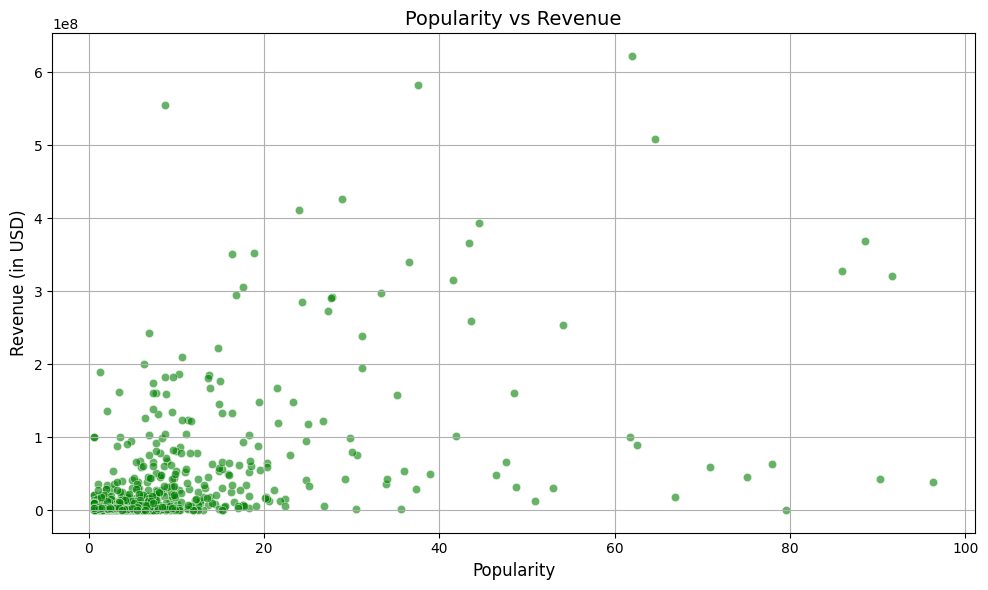

In [376]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df_clean = df[(df['popularity'] > 0) & (df['revenue'] > 0)]
df_clean = df_clean[df_clean['popularity'] < df_clean['popularity'].quantile(0.99)]
df_clean = df_clean[df_clean['revenue'] < df_clean['revenue'].quantile(0.99)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='revenue', data=df_clean, color='green', alpha=0.6)
plt.title("Popularity vs Revenue", fontsize=14)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Revenue (in USD)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


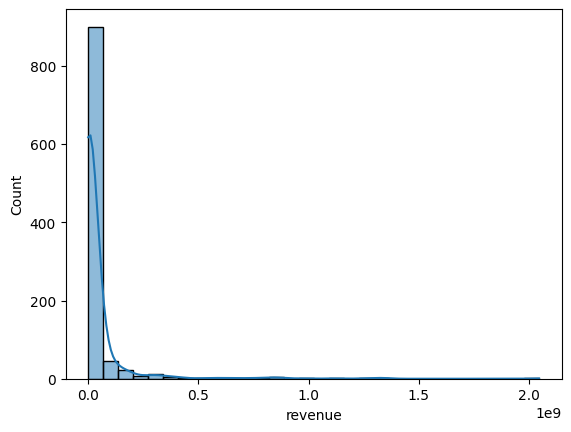

In [377]:
sns.histplot(df['revenue'], bins=30, kde=True)
plt.show()


In [378]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day
df['release_dayofweek'] = df['release_date'].dt.day_name()
df['release_quarter'] = df['release_date'].dt.quarter
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\3913070473.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [379]:
df.head()

,title,budget,imdb_id,original_language,overview,popularity,release_date,runtime,tagline,rating,totalVotes,revenue,release_year,release_month,release_day,release_dayofweek,release_quarter
0,Vice,60000000,tt6266538,English,"George W. Bush picks Dick Cheney, the CEO of H...",75.120,2018-12-25,132.0,The Untold True Story That Changed The Course ...,7.2,511,45520237,2018,12,25,Tuesday,4
1,Mary Queen of Scots,25000000,tt2328900,English,"Mary Stuart, considered by many the legitimate...",96.340,2018-12-21,125.0,Bow To No One,6.7,182,37807625,2018,12,21,Friday,4
2,Mary Poppins Returns,130000000,tt5028340,English,"In Depression-era London, a now-grown Jane and...",91.674,2018-12-19,131.0,Magic Always Returns,6.8,824,320264753,2018,12,19,Wednesday,4
4,Bumblebee,128000000,tt4701182,English,"On the run in the year 1987, Bumblebee finds r...",116.519,2018-12-15,114.0,Every adventure has a beginning,6.4,1222,420361283,2018,12,15,Saturday,4
5,Dragon Ball Super: Broly,8500000,tt7961060,Japanese,Earth is peaceful following the Tournament of ...,62.533,2018-12-14,101.0,Three Saiyans directed by fate... an uncontrol...,7.4,395,89617139,2018,12,14,Friday,4


C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\3858158915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=df, palette='Blues_r')


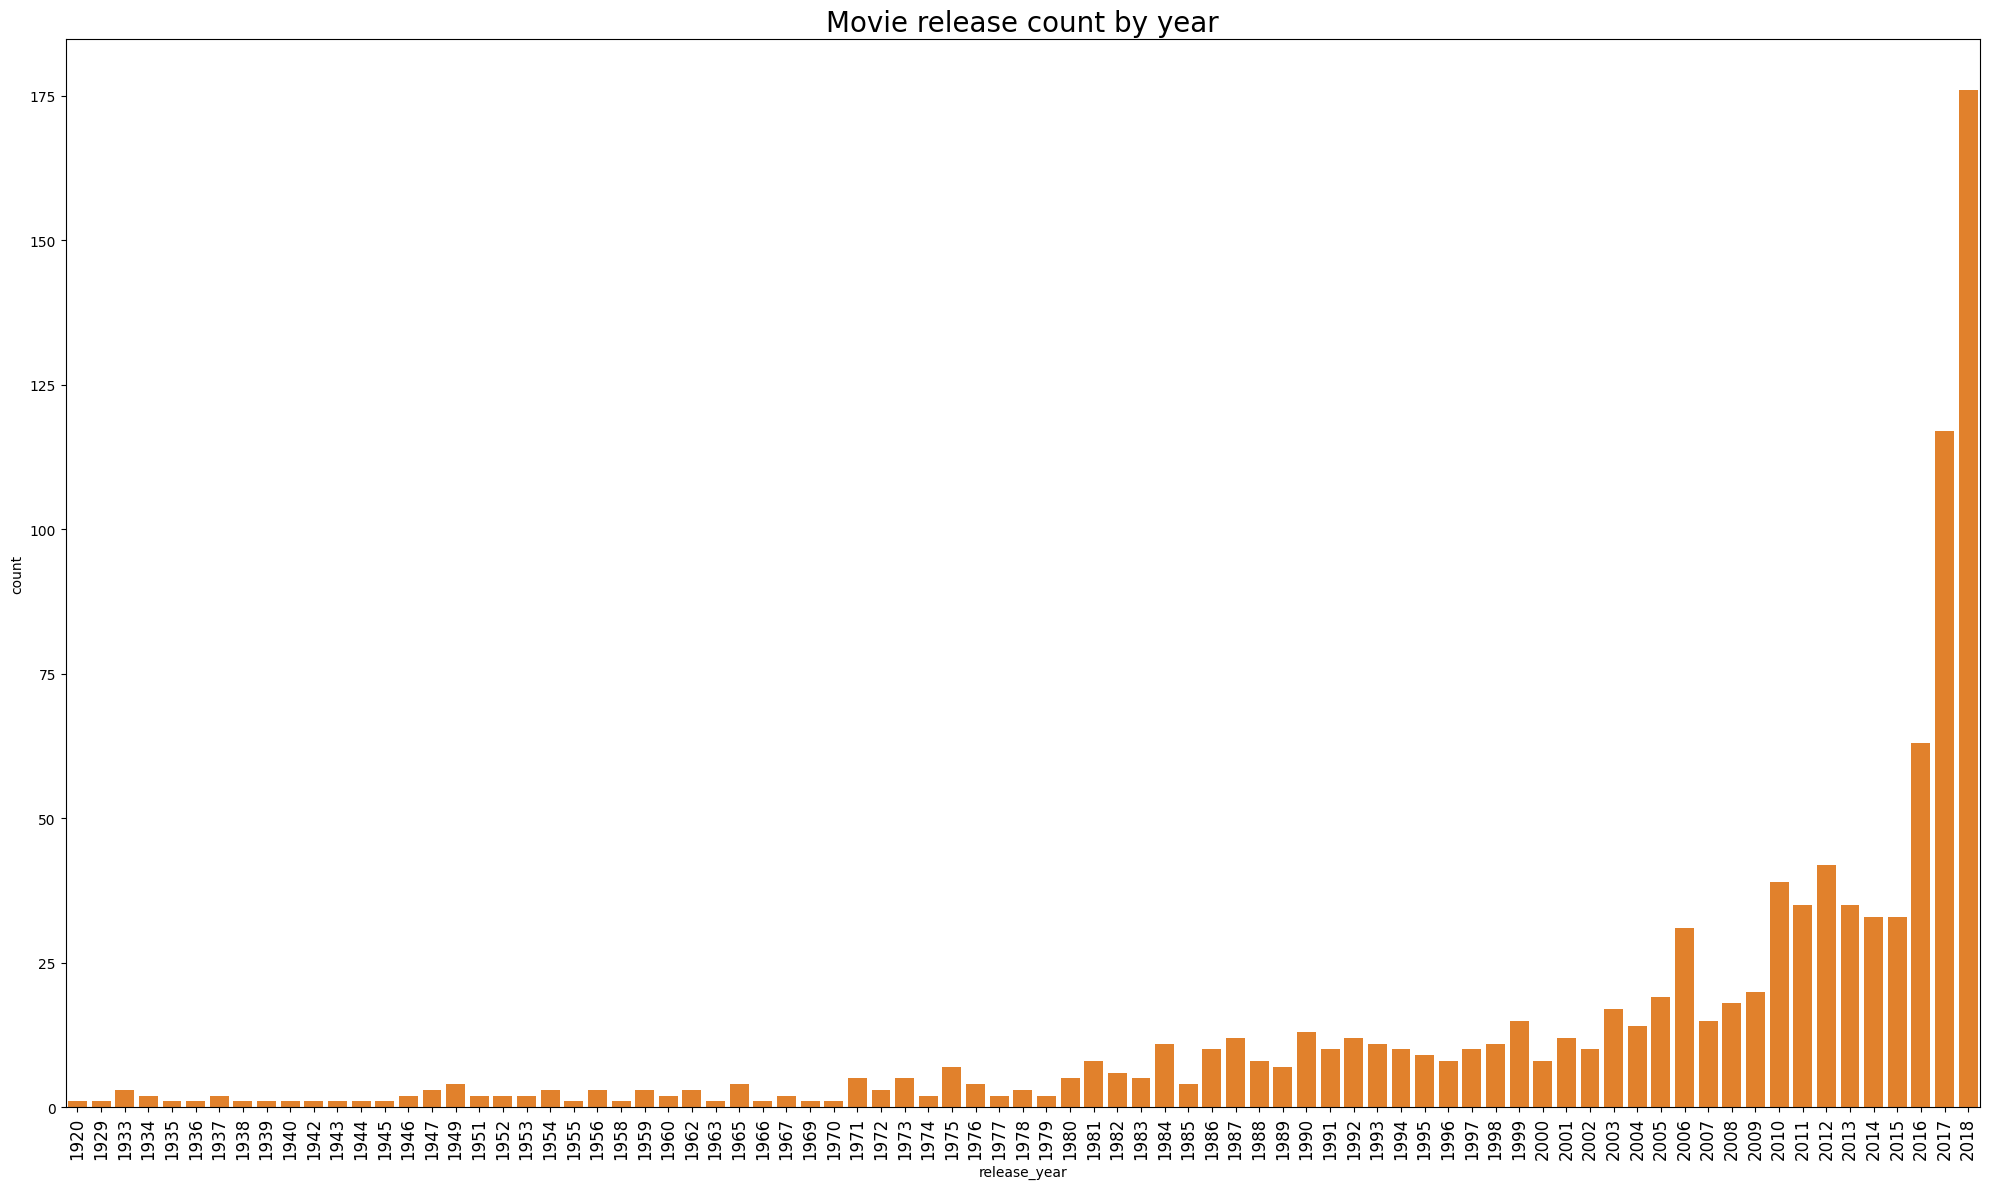

In [380]:
plt.figure(figsize=(20, 12))
sns.countplot(x='release_year', data=df, palette='Blues_r')
sns.countplot(x='release_year', data=df, order=sorted(df['release_year'].unique()))
plt.title('Movie release count by year', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


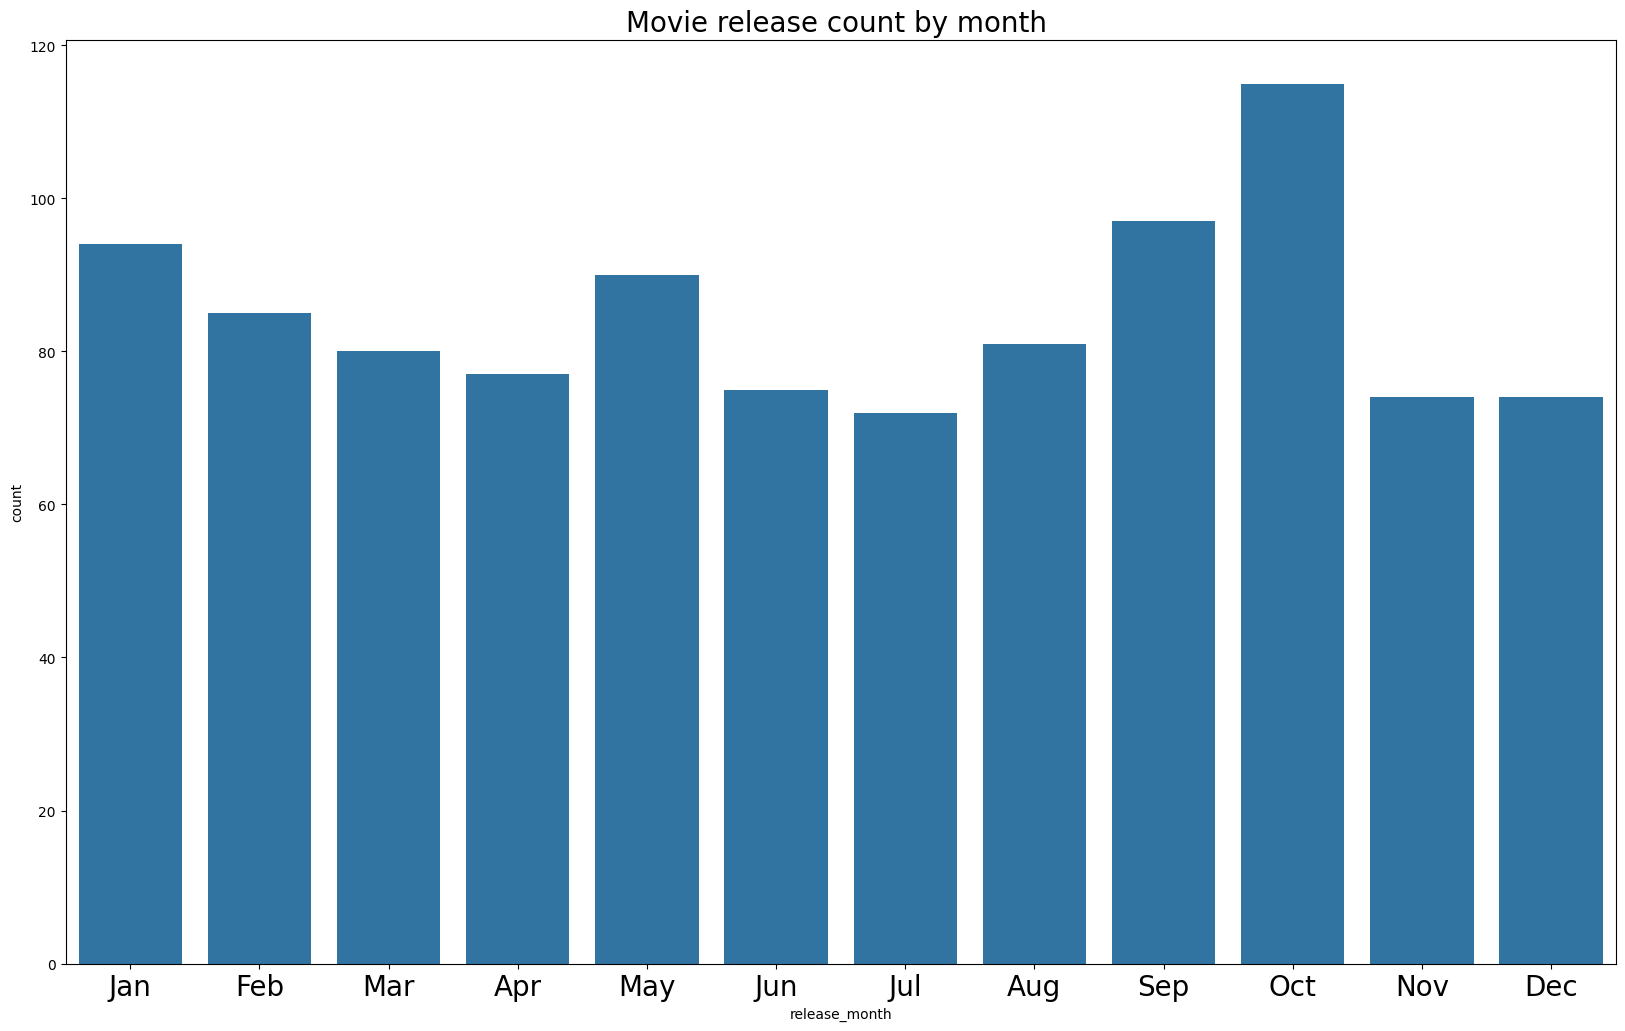

In [381]:
plt.figure(figsize= (20,12))
sns.countplot(x='release_month', data=df, order=sorted(df['release_month'].unique()))
plt.title('Movie release count by month ', fontsize= 20)
loc, labels = plt.xticks()
loc, labels = loc, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(loc, labels, fontsize= 20)
plt.show()

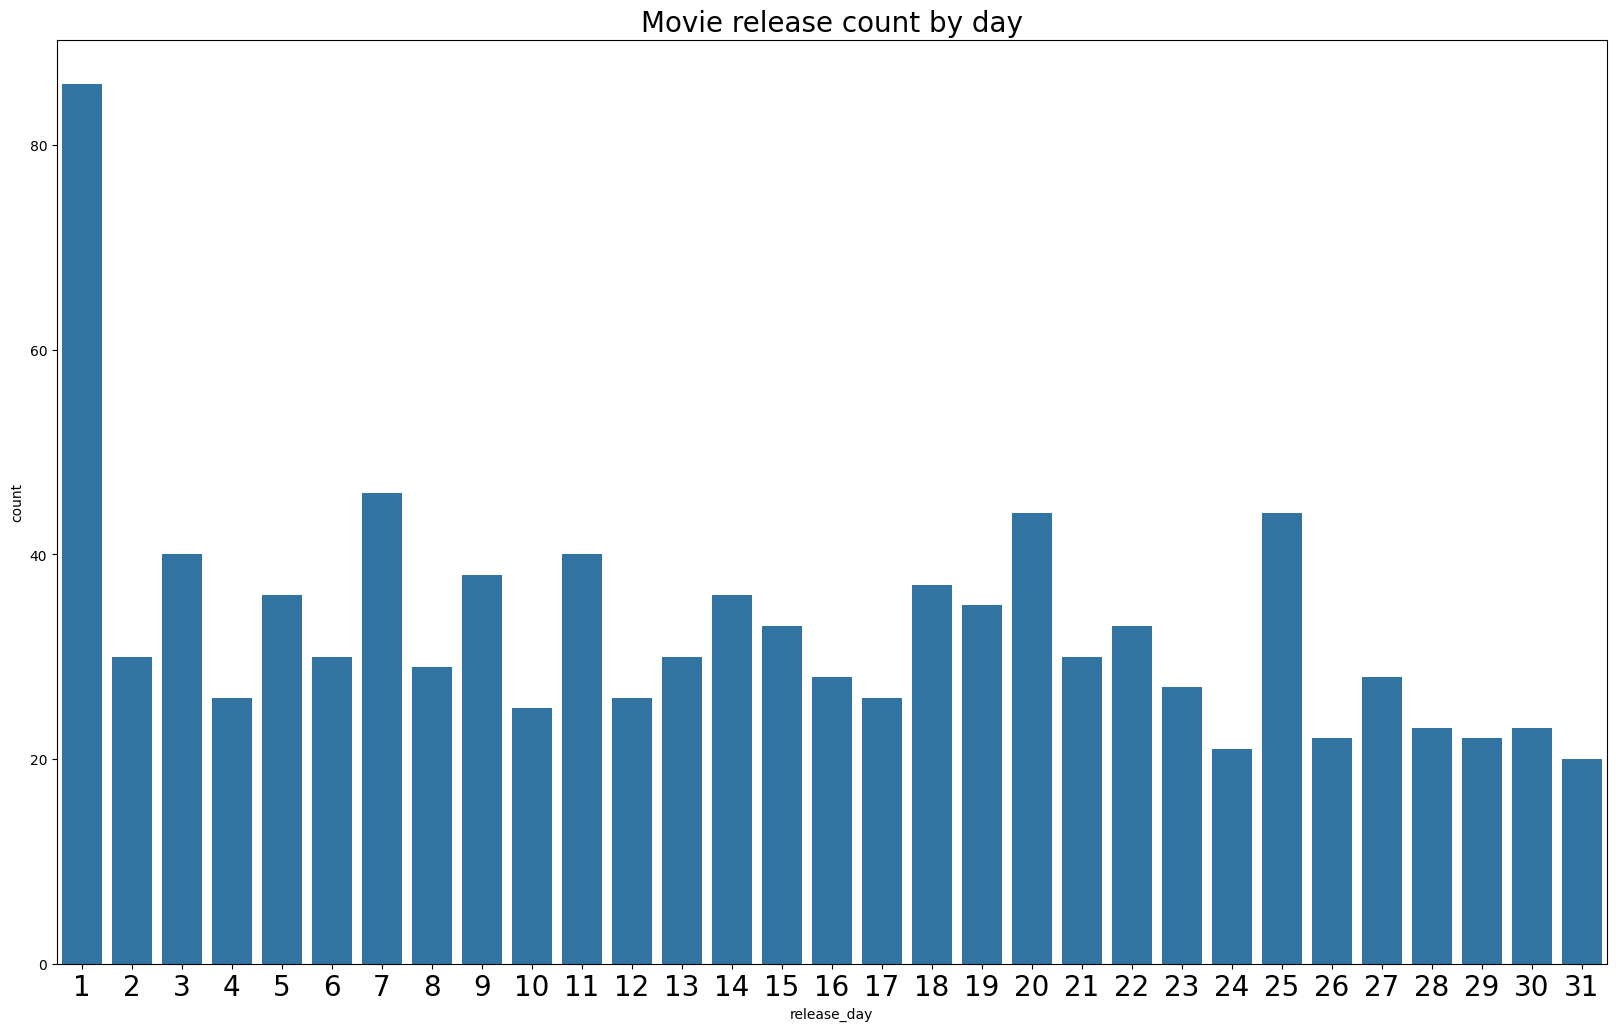

In [382]:
plt.figure(figsize= (20,12))
sns.countplot(x='release_day', data=df, order=sorted(df['release_day'].unique()))
plt.title('Movie release count by day', fontsize= 20)
plt.xticks(fontsize= 20)
plt.show()

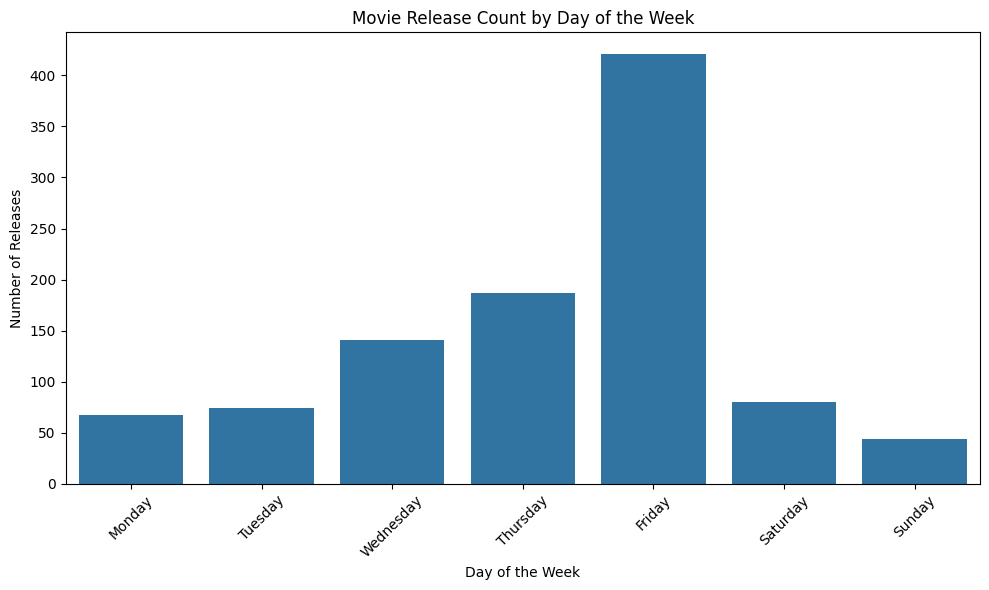

In [383]:
plt.figure(figsize=(10, 6))
sns.countplot(x='release_dayofweek', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.title('Movie Release Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\780845787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_quarter', data=df, palette='Set2')


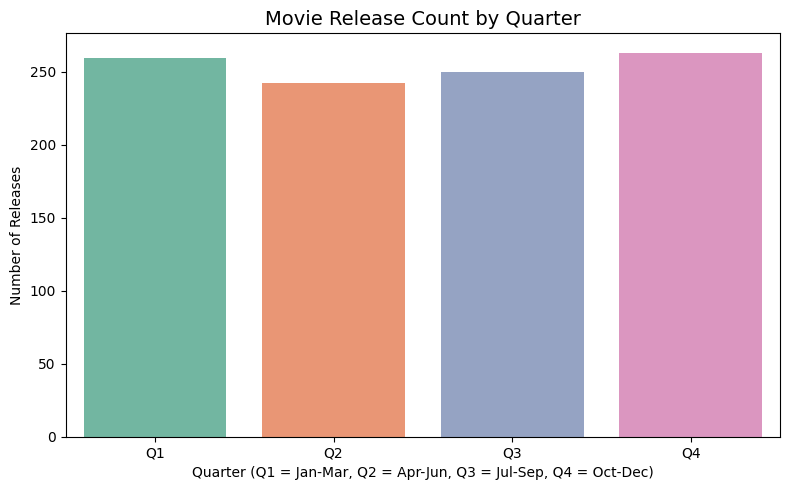

In [384]:
plt.figure(figsize=(8, 5))
sns.countplot(x='release_quarter', data=df, palette='Set2')

plt.title("Movie Release Count by Quarter", fontsize=14)
plt.xlabel("Quarter (Q1 = Jan-Mar, Q2 = Apr-Jun, Q3 = Jul-Sep, Q4 = Oct-Dec)")
plt.ylabel("Number of Releases")
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.tight_layout()
plt.show()

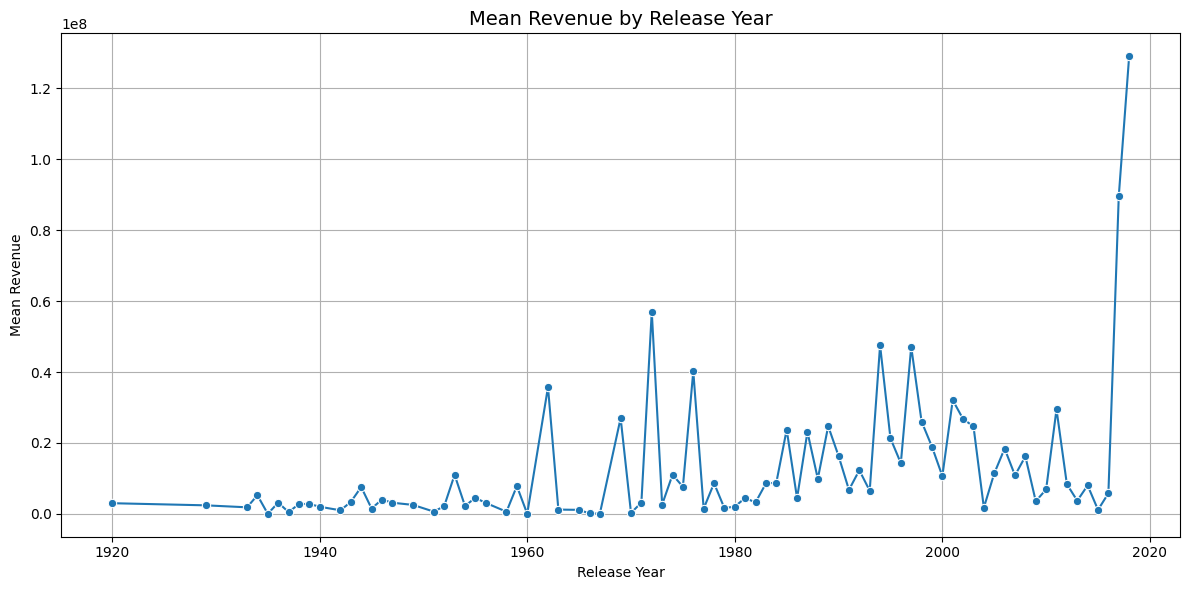

In [385]:
mean_revenue_by_year = df.groupby('release_year')['revenue'].mean().dropna()
plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_revenue_by_year.index, y=mean_revenue_by_year.values, marker='o')

plt.title("Mean Revenue by Release Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Mean Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

In [386]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['release_month'] = df['release_date'].dt.month
df['month_name'] = df['release_date'].dt.month_name()
mean_revenue_by_month = df.groupby(['release_month', 'month_name'])['revenue'].mean().reset_index()
mean_revenue_by_month = mean_revenue_by_month.sort_values('release_month')



C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\1567456665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='revenue', data=mean_revenue_by_month, palette='viridis')


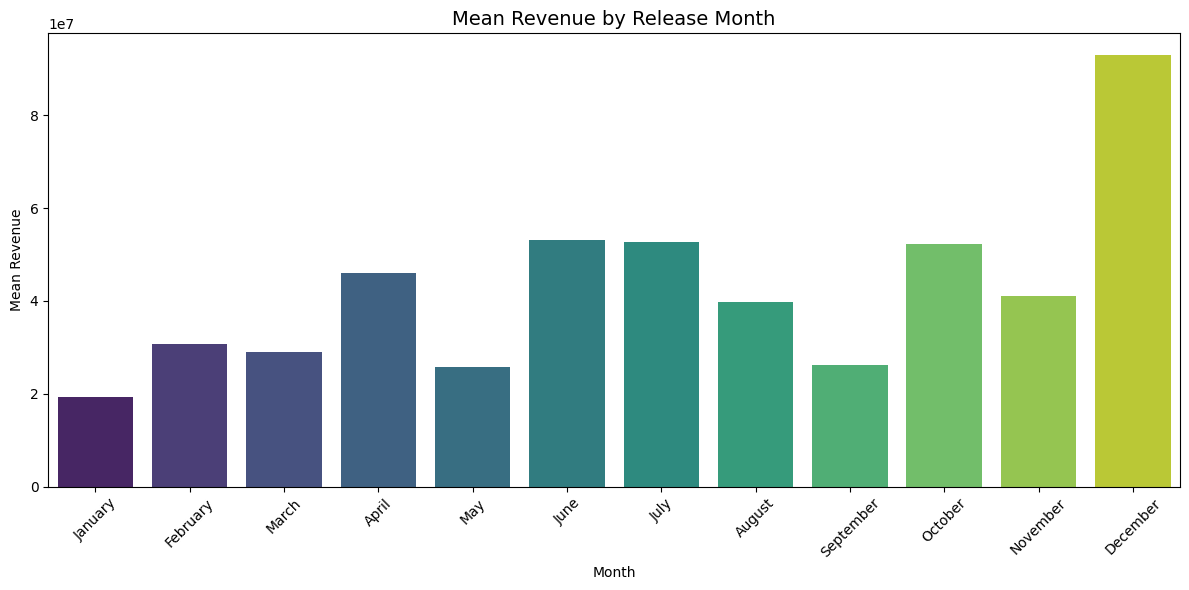

In [387]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month_name', y='revenue', data=mean_revenue_by_month, palette='viridis')
plt.title("Mean Revenue by Release Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Mean Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [388]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['release_day'] = df['release_date'].dt.day_name()
df_clean = df.dropna(subset=['release_day', 'revenue'])
mean_revenue_by_day = df_clean.groupby('release_day')['revenue'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()



C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\3337401253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_revenue_by_day, x='release_day', y='revenue', palette='flare')


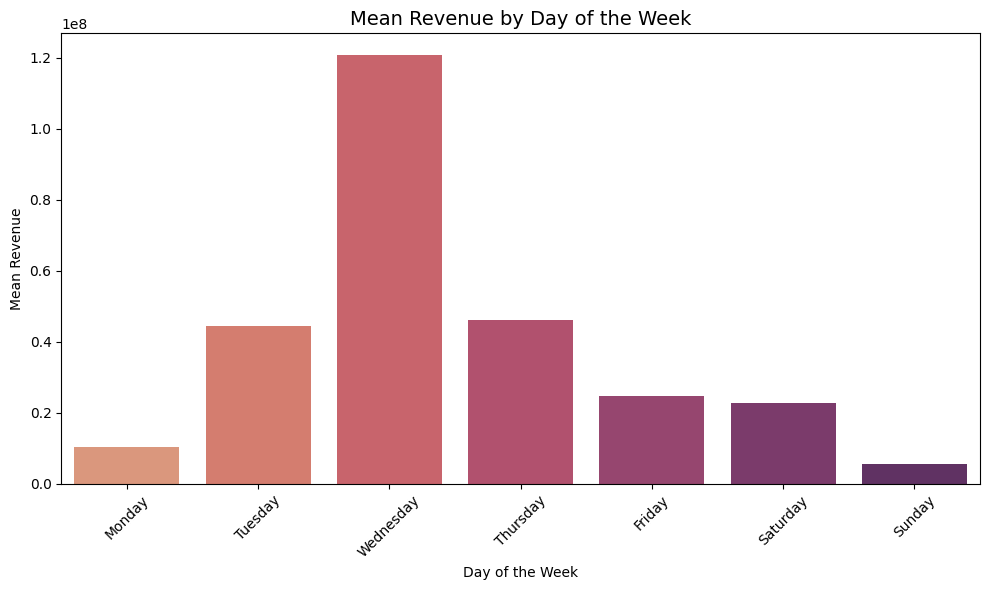

In [389]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_revenue_by_day, x='release_day', y='revenue', palette='flare')

plt.title("Mean Revenue by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Mean Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [390]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['release_quarter'] = df['release_date'].dt.quarter
quarter_labels = {
    1: 'Q1 (Jan–Mar)',
    2: 'Q2 (Apr–Jun)',
    3: 'Q3 (Jul–Sep)',
    4: 'Q4 (Oct–Dec)'
}
df['release_season'] = df['release_quarter'].map(quarter_labels)
df_clean = df.dropna(subset=['release_season', 'revenue'])
mean_revenue_by_quarter = df_clean.groupby('release_season')['revenue'].mean().reindex([
    'Q1 (Jan–Mar)', 'Q2 (Apr–Jun)', 'Q3 (Jul–Sep)', 'Q4 (Oct–Dec)'
]).reset_index()



C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\2642656850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_season', y='revenue', data=mean_revenue_by_quarter, palette='coolwarm')


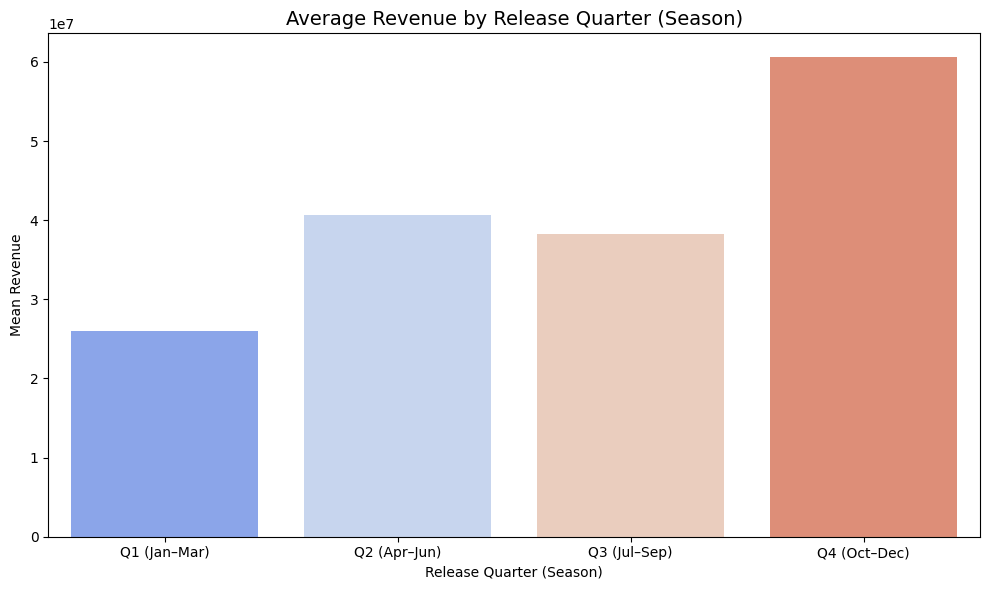

In [391]:
plt.figure(figsize=(10, 6))
sns.barplot(x='release_season', y='revenue', data=mean_revenue_by_quarter, palette='coolwarm')

plt.title('Average Revenue by Release Quarter (Season)', fontsize=14)
plt.xlabel('Release Quarter (Season)')
plt.ylabel('Mean Revenue')
plt.tight_layout()
plt.show()

Original Language count

In [392]:
language_counts = df['original_language'].value_counts().reset_index()
language_counts.columns = ['original_language', 'movie_count']
top_langs = language_counts.head(10)


C:\Users\vijay\AppData\Local\Temp\ipykernel_15136\3864170983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='original_language', y='movie_count', data=top_langs, palette='mako')


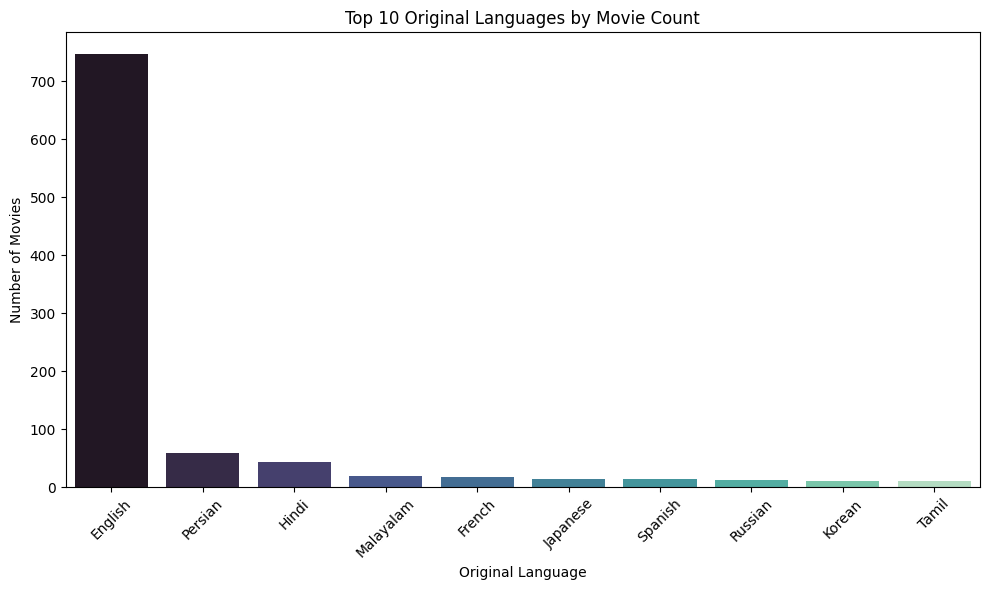

In [393]:
plt.figure(figsize=(10, 6))
sns.barplot(x='original_language', y='movie_count', data=top_langs, palette='mako')
plt.title('Top 10 Original Languages by Movie Count')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


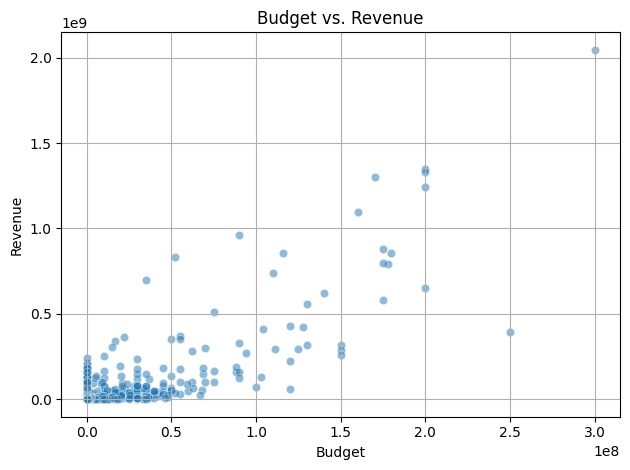

In [394]:
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


In [395]:
le_dict = {}  # Save encoders to use later
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

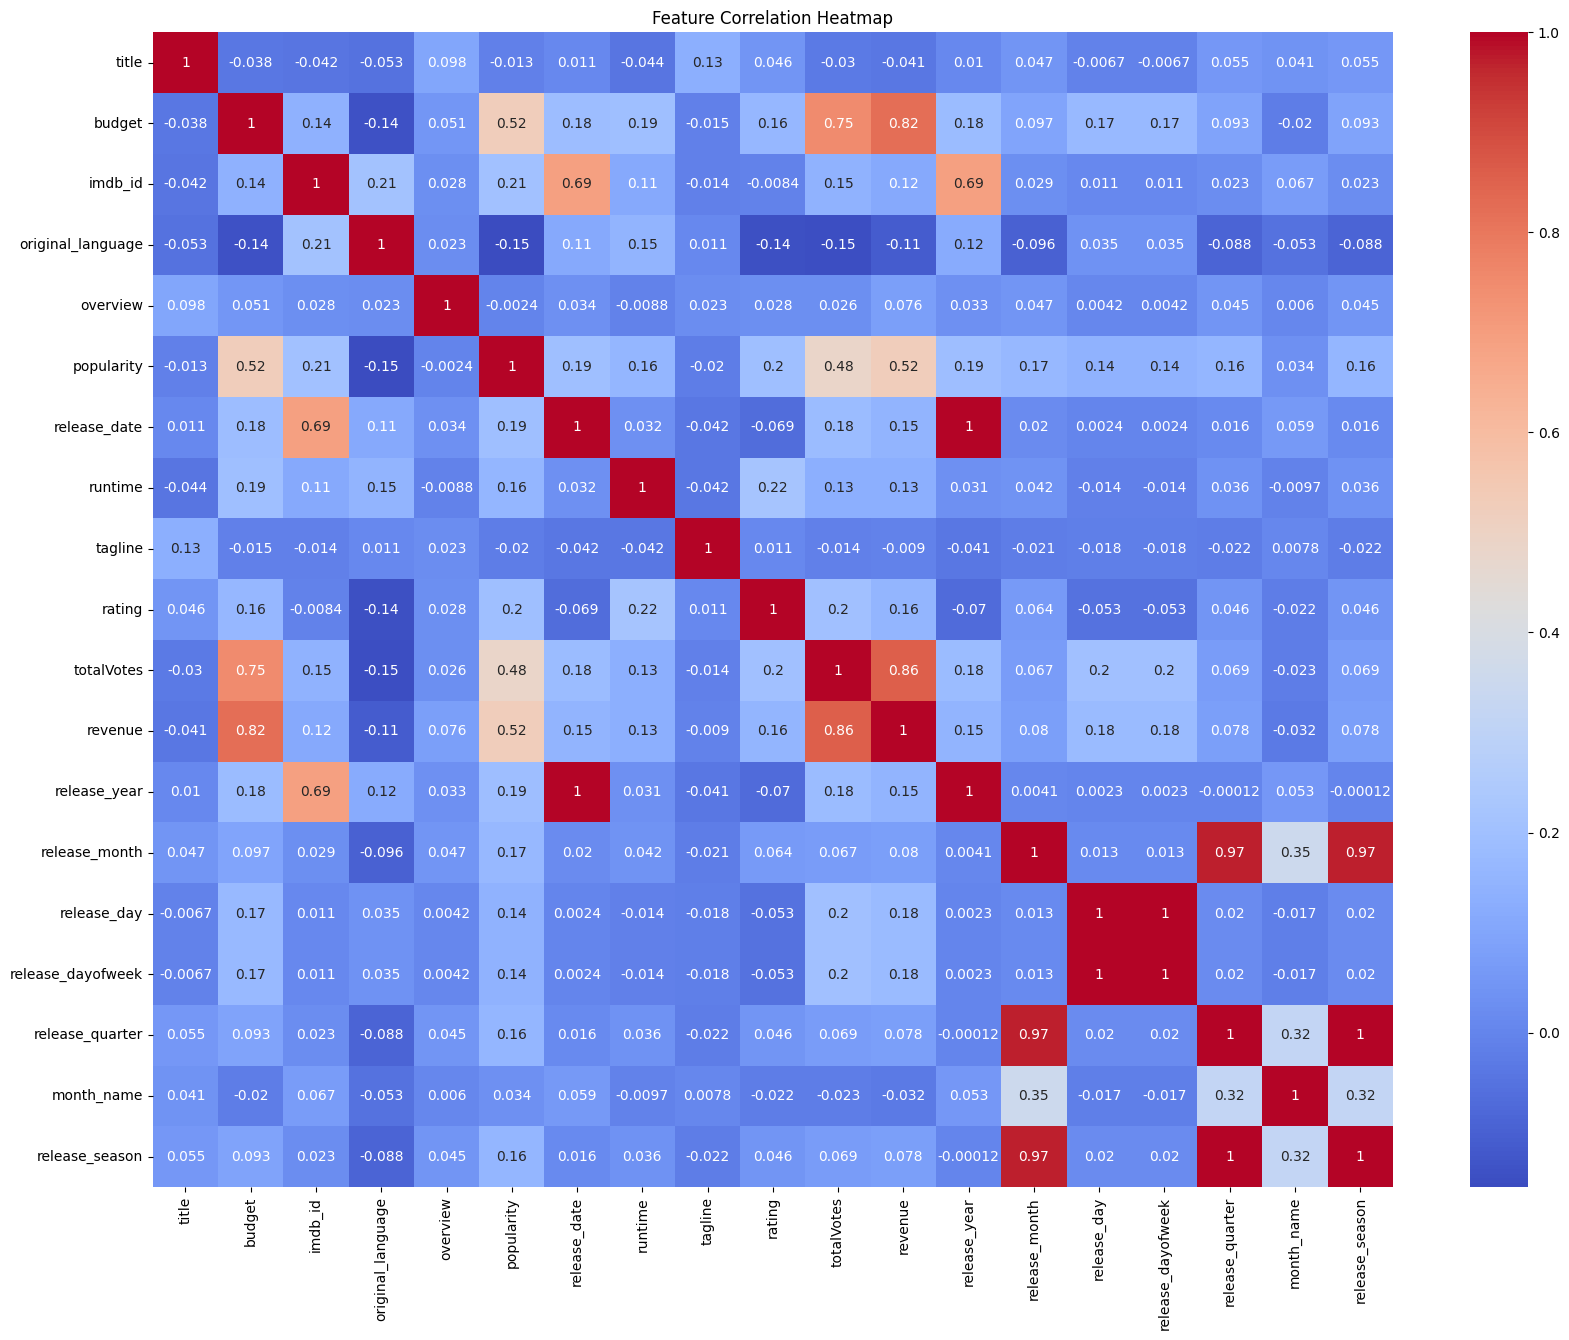

In [396]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [400]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# 🔢 Convert numeric columns
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# 🧼 Remove invalid rows
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df = df[(df['budget'] < df['budget'].quantile(0.99)) & (df['revenue'] < df['revenue'].quantile(0.99))]

# 🔠 Label encode all categorical columns
le_dict = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# 🎯 Define features (X) and target (y)
X = df[['budget', 'popularity', 'runtime', 'release_year']]  # You can add more features if you want
y = df['revenue']

# 📏 Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧠 Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Training complete")
print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"📊 R^2 Score: {r2:.4f}")

# 💾 Save model, scaler, and encoders for Flask
joblib.dump(model, "movie_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_dict, "encoders.pkl")

print("📁 Files saved: movie_model.pkl, scaler.pkl, encoders.pkl")


✅ Training complete
📉 Mean Squared Error: 3978797948821125.50
📊 R^2 Score: 0.5756
📁 Files saved: movie_model.pkl, scaler.pkl, encoders.pkl
